<a href="https://colab.research.google.com/github/samuelgamaral/PreverPrecoCasa/blob/main/Prever_preco_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!git clone https://github.com/samuelgamaral/PreverPrecoCasa.git

fatal: destination path 'PreverPrecoCasa' already exists and is not an empty directory.


In [77]:
import pandas as pd

data = pd.read_csv("/content/PreverPrecoCasa/dataset.csv")

df = pd.DataFrame(data)

df.head()

,area_lote,ano_construcao,area_primeiro_andar,area_segundo_andar,num_banheiros,num_quartos_acima_solo,num_quartos_total,preco_venda
0,8270,1958,1209,1875,2,5,7,761470
1,1860,2023,2379,1763,2,5,5,365230
2,6390,2007,1684,520,2,5,5,444820
3,6191,1966,2724,1701,1,2,2,627650
4,6734,1956,784,1016,3,4,4,681180


In [78]:
# Verificando os valores nulos ou ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   area_lote               500 non-null    int64
 1   ano_construcao          500 non-null    int64
 2   area_primeiro_andar     500 non-null    int64
 3   area_segundo_andar      500 non-null    int64
 4   num_banheiros           500 non-null    int64
 5   num_quartos_acima_solo  500 non-null    int64
 6   num_quartos_total       500 non-null    int64
 7   preco_venda             500 non-null    int64
dtypes: int64(8)
memory usage: 31.4 KB


In [79]:
from sklearn.preprocessing import StandardScaler

# Normalizando os dados com o StandardScaler
df[["area_lote", "ano_construcao", "area_primeiro_andar", "area_segundo_andar", "num_banheiros", "num_quartos_acima_solo", "num_quartos_total", "preco_venda"]] = StandardScaler().fit_transform(df[["area_lote", "ano_construcao", "area_primeiro_andar", "area_segundo_andar", "num_banheiros", "num_quartos_acima_solo", "num_quartos_total", "preco_venda"]])

df.head()

,area_lote,ano_construcao,area_primeiro_andar,area_segundo_andar,num_banheiros,num_quartos_acima_solo,num_quartos_total,preco_venda
0,1.040265,-1.287893,-0.674610,0.897864,-0.443750,1.388447,1.750438,1.833317
1,-1.484373,1.646935,0.974513,0.742687,-0.443750,1.388447,0.570898,-1.477164
2,0.299810,0.924516,-0.005094,-0.979498,-0.443750,1.388447,0.570898,-0.812210
3,0.221432,-0.926683,1.460793,0.656786,-1.324206,-0.721655,-1.198413,0.715286
4,0.435297,-1.378195,-1.273650,-0.292287,0.436706,0.685080,-0.018873,1.162515


In [80]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definindo as variáveis para o modelo
X = df[["area_lote", "ano_construcao", "area_primeiro_andar", "area_segundo_andar", "num_banheiros", "num_quartos_acima_solo", "num_quartos_total"]]
y = df["preco_venda"]

# Criando o conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando e realizando a previsão
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Verificando a precisão do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

MSE: 0.00
R2: 1.00


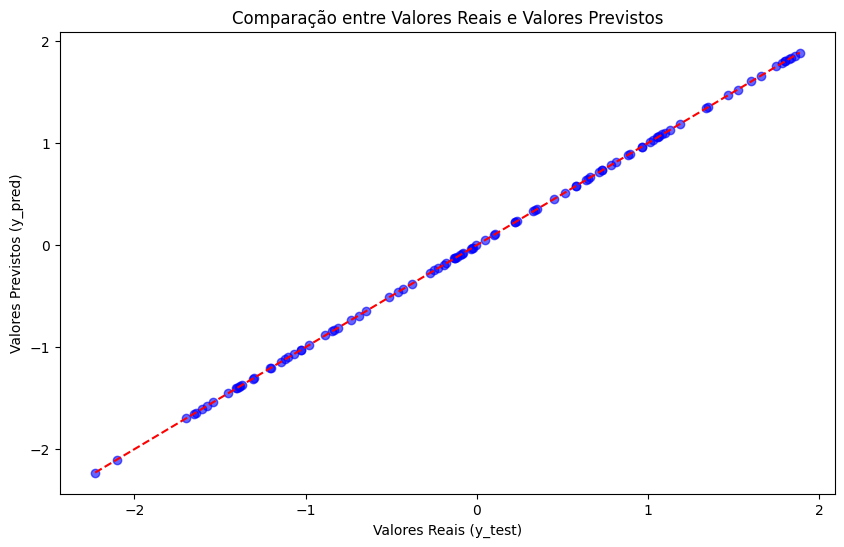

In [81]:
# Comparando os valores reais com os previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Previstos (y_pred)')
plt.title('Comparação entre Valores Reais e Valores Previstos')
plt.show()